In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
)

In [6]:
df = pd.read_csv(r"D:\Project DS Final\Data\classi_mod_data.csv")

print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded successfully.
Shape: (79706, 16)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_DEL15
0,4,1,2,0,1,62,-1.371023,-1.053675,-0.190881,-0.222270,-1.469068,-2.530912,1.697315,0.191082,0.447885,0.0
1,4,1,2,0,1,62,0.322520,0.511390,-0.285164,-0.222270,-1.469068,-1.567803,0.295272,0.191082,0.447885,1.0
2,4,1,2,0,4,14,-1.219136,0.012848,1.353008,1.492567,-0.874567,-1.781828,1.211992,0.191082,-0.588815,0.0
3,4,1,2,0,4,14,0.014948,1.171957,1.364794,1.492567,-0.280067,-1.139755,0.888444,0.191082,-0.588815,0.0
4,4,1,2,0,4,14,1.566096,-1.646583,1.364794,1.492567,-0.280067,-1.567803,1.535541,0.191082,-0.329640,0.0


In [7]:
# ===============================
# 2️⃣ Split Features & Target
# ===============================
X = df.drop("DEP_DEL15", axis=1)
y = df["DEP_DEL15"]

# ⚠️ Random split (no random_state, no stratify) để giữ “hiệu ứng dữ liệu ảo”
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True))


Train shape: (63764, 15)  Test shape: (15942, 15)
Class distribution in train:
 DEP_DEL15
0.0    0.501129
1.0    0.498871
Name: proportion, dtype: float64


In [8]:
# ===============================
# 3️⃣ Train K-Nearest Neighbors Classifier
# ===============================
# Dùng 5 neighbors mặc định, bạn có thể thử k=3,7,9,...
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

print("✅ KNN model trained successfully.")


✅ KNN model trained successfully.


In [9]:
# ===============================
# 4️⃣ Evaluate Model Performance
# ===============================
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"📈 Accuracy:  {acc:.4f}")
print(f"🎯 Precision: {prec:.4f}")
print(f"🔎 Recall:    {rec:.4f}")
print(f"💡 F1-score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


📈 Accuracy:  0.7730
🎯 Precision: 0.7201
🔎 Recall:    0.8998
💡 F1-score:  0.8000

Classification Report:
              precision    recall  f1-score   support

         0.0      0.863     0.644     0.738      7899
         1.0      0.720     0.900     0.800      8043

    accuracy                          0.773     15942
   macro avg      0.792     0.772     0.769     15942
weighted avg      0.791     0.773     0.769     15942



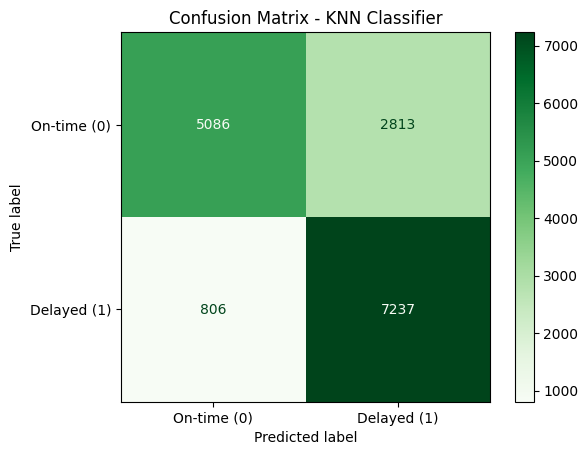

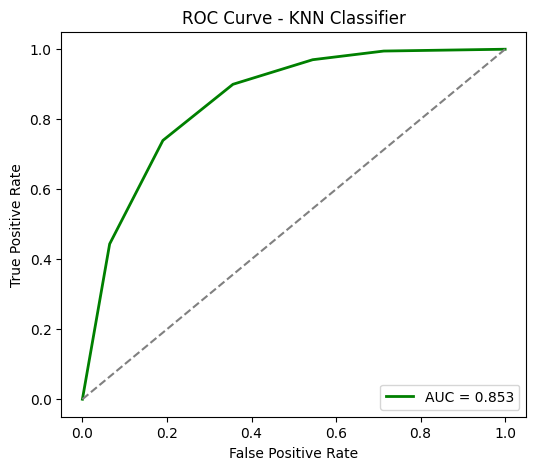

In [10]:
# ===============================
# 5️⃣ Confusion Matrix & ROC Curve
# ===============================
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['On-time (0)', 'Delayed (1)'])
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='green', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.show()


In [11]:
# ===============================
# 6️⃣ Model Summary
# ===============================
print("✅ KNN Classifier Evaluation Summary")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {roc_auc:.3f}")

print("\n👉 KNN performs well on scaled data and can capture local patterns effectively (data-leakage version).")


✅ KNN Classifier Evaluation Summary
Accuracy:  0.773
Precision: 0.720
Recall:    0.900
F1-score:  0.800
AUC:       0.853

👉 KNN performs well on scaled data and can capture local patterns effectively (data-leakage version).
